## PARTE A - Transformación de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv (r'C:\Users\leand\Desktop\DATA SCIENCE\Notebooks\Sprint 1\DS_Proyecto_01_Datos_Properati.csv')

In [3]:
data.shape

(146660, 19)

In [4]:
data = data[data.l2 == 'Capital Federal']
data = data[(data.property_type == 'Departamento') | (data.property_type == 'Casa') | (data.property_type == 'PH')]
data = data[(data.surface_total >= data.surface_covered)]
data.shape

(81291, 19)

## <font color='red'> 1- En esta primera etapa, se procederá a explorar los datos para identificar los valores atípicos, y así posteriormente determinar qué tratamiento se les dará</font>

Text(0.5, 0, 'Precio (USD)')

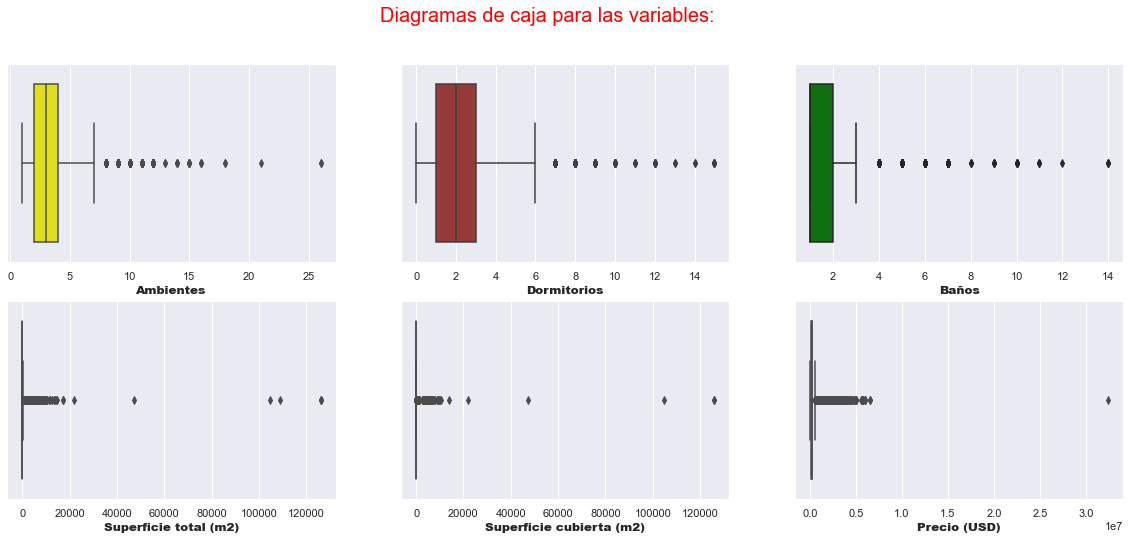

In [5]:
plt.figure(figsize=(20,8))

plt.suptitle('Diagramas de caja para las variables:', color='red', fontsize=20)

plt.subplot(2,3,1)
sns.boxplot(x=data['rooms'], color = 'yellow')
plt.xlabel('Ambientes', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,2)
sns.boxplot(x=data['bedrooms'], color = 'brown')
plt.xlabel('Dormitorios', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,3)
sns.boxplot(x=data['bathrooms'], color= 'green')
plt.xlabel('Baños', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,4)
sns.boxplot(x=data['surface_total'])
plt.xlabel('Superficie total (m2)', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,5)
sns.boxplot(x=data['surface_covered'])
plt.xlabel('Superficie cubierta (m2)', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,6)
sns.boxplot(x=data['price'])
plt.xlabel('Precio (USD)', fontweight= 'black', fontsize= 12)

<font color='green'>**A continuación, se grafican diagramas de barras para las variables cuantitativas discretas e histogramas para las cuantitativas continuas**<font>

Text(0, 0.5, 'Cantidad')

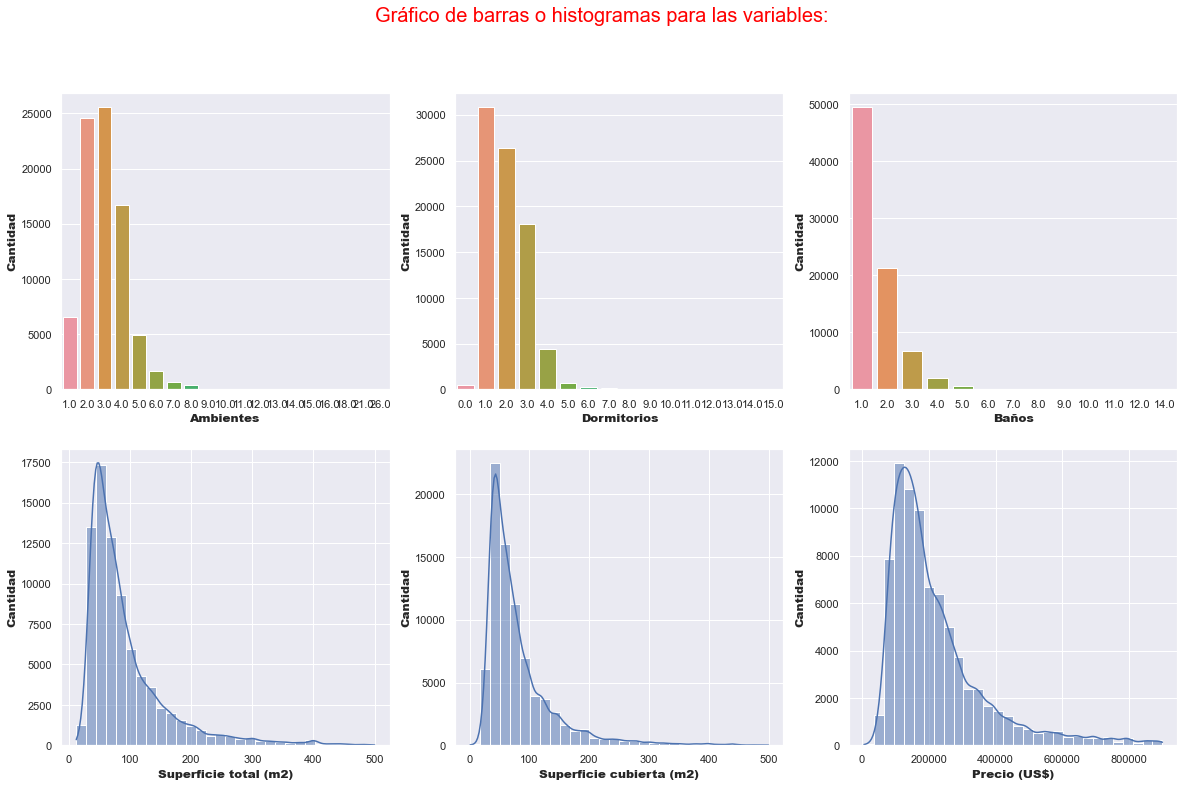

In [6]:
plt.figure(figsize=(20,12))

plt.suptitle('Gráfico de barras o histogramas para las variables:', color='red', fontsize=20)

plt.subplot(2,3,1)
sns.countplot(x= data.rooms)
plt.xlabel('Ambientes', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,2)
sns.countplot(x= data.bedrooms)
plt.xlabel('Dormitorios', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,3)
sns.countplot(x= 'bathrooms', data=data)
plt.xlabel('Baños', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,4)
max1= data[data.surface_total <=500] #Este valor arbitrario es para permitir su correcta visualización en un histograma
sns.histplot(max1['surface_total'], kde=True, bins=30)
plt.xlabel('Superficie total (m2)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,5)
max2 = data[data.surface_covered <= 500]
sns.histplot(max2['surface_covered'], kde=True, bins=30)
plt.xlabel('Superficie cubierta (m2)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,6)
max3 = data[data.price <= 900000]
sns.histplot(max3['price'], kde=True, bins=30)
plt.xlabel('Precio (US$)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

In [7]:
data.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  77040.000000  77040.000000  81291.000000  81291.000000  80458.000000   
mean     -34.598354    -58.434841      3.004957      1.998745      1.554600   
std        0.023408      0.035766      1.299796      1.045831      0.853083   
min      -34.696419    -58.530468      1.000000      0.000000      1.000000   
25%      -34.612168    -58.457280      2.000000      1.000000      1.000000   
50%      -34.598669    -58.432771      3.000000      2.000000      1.000000   
75%      -34.584161    -58.409599      4.000000      3.000000      2.000000   
max      -34.535909    -58.353930     26.000000     15.000000     14.000000   

       surface_total  surface_covered         price  
count   81291.000000     81291.000000  8.129100e+04  
mean      112.920348        92.261271  2.657606e+05  
std       988.263003       769.777375  3.337463e+05  
min        12.000000         1.000000  6.000000e+03  
25%        49.500000        44.000000  1.250000e+05  
50%        71.000000        63.000000  1.800000e+05  
75%       111.000000        96.000000  2.800000e+05  
max    126062.000000    126062.000000  3.243423e+07

####        En esta instancia, eliminamos los outliers aplicando la técnica del rango intercuartílico, ya que es una de las más empleadas y efectivas en la materia.
*Como se desprende de los gráficos, la presencia de estos valores atípicos no solo que distorsionan el análisis que se puede hacer de un determinado conjunto de valores, sino que tambíen su presencia afectaría de manera considerable el rendimiento de un modelo de machine learning.*

In [8]:
lista = data[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

for i in lista: 
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    BI = Q1 - 1.5*IQR
    BS = Q3 + 1.5*IQR
    #print (i,IQR, BI, BS)
    out = (data[i]<BI) | (data[i]>BS)
    print('Cantidad de valores eliminados para el atributo', [i],':', out.sum())
    data = data[~out]

data.shape

Cantidad de valores eliminados para el atributo ['rooms'] : 625
Cantidad de valores eliminados para el atributo ['bedrooms'] : 19
Cantidad de valores eliminados para el atributo ['bathrooms'] : 2609
Cantidad de valores eliminados para el atributo ['surface_total'] : 5575
Cantidad de valores eliminados para el atributo ['surface_covered'] : 2823
Cantidad de valores eliminados para el atributo ['price'] : 3096


(66544, 19)

### Volvemos a graficar, una vez eliminados los outliers con la regla del rango intercuartílico

Text(0.5, 0, 'Precio (USD)')

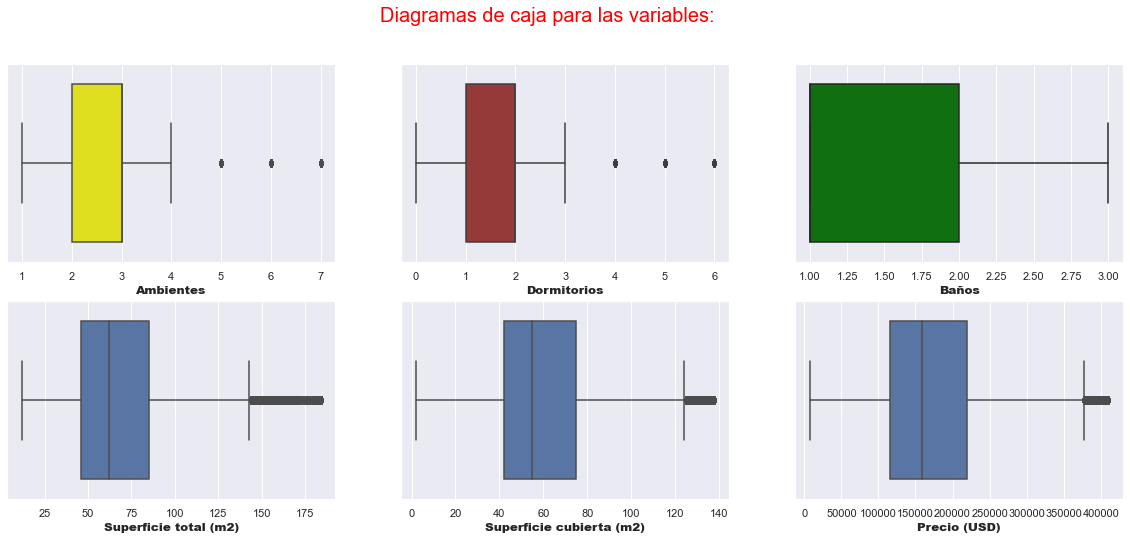

In [9]:
plt.figure(figsize=(20,8))

plt.suptitle('Diagramas de caja para las variables:', color='red', fontsize=20)

plt.subplot(2,3,1)
sns.boxplot(x=data['rooms'], color = 'yellow')
plt.xlabel('Ambientes', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,2)
sns.boxplot(x=data['bedrooms'], color = 'brown')
plt.xlabel('Dormitorios', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,3)
sns.boxplot(x=data['bathrooms'], color= 'green')
plt.xlabel('Baños', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,4)
sns.boxplot(x=data['surface_total'])
plt.xlabel('Superficie total (m2)', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,5)
sns.boxplot(x=data['surface_covered'])
plt.xlabel('Superficie cubierta (m2)', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,6)
sns.boxplot(x=data['price'])
plt.xlabel('Precio (USD)', fontweight= 'black', fontsize= 12)

Text(0, 0.5, 'Cantidad')

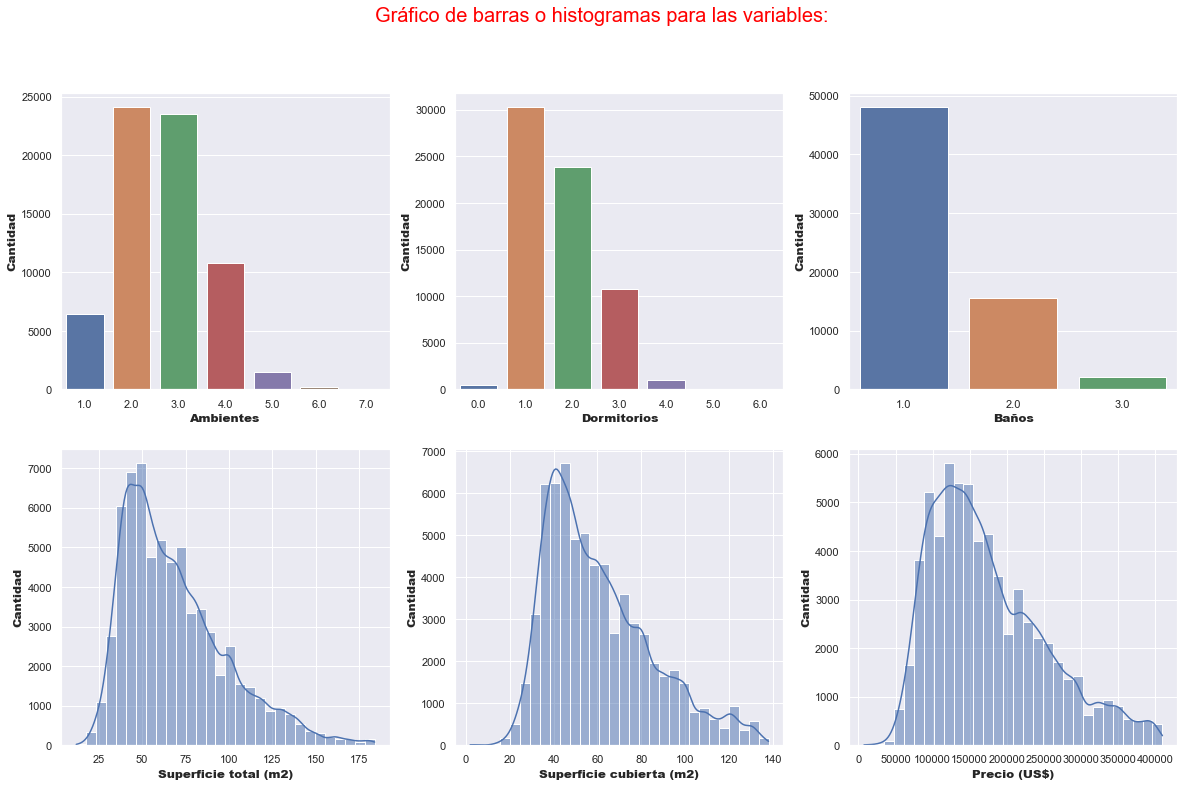

In [10]:
plt.figure(figsize=(20,12))

plt.suptitle('Gráfico de barras o histogramas para las variables:', color='red', fontsize=20)

plt.subplot(2,3,1)
sns.countplot(x= data.rooms)
plt.xlabel('Ambientes', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,2)
sns.countplot(x= data.bedrooms)
plt.xlabel('Dormitorios', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,3)
sns.countplot(x= 'bathrooms', data=data)
plt.xlabel('Baños', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,4)
max1= data[data.surface_total <=500] #Este valor arbitrario es para permitir su correcta visualización en un histograma
sns.histplot(max1['surface_total'], kde=True, bins=30)
plt.xlabel('Superficie total (m2)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,5)
max2 = data[data.surface_covered <= 500]
sns.histplot(max2['surface_covered'], kde=True, bins=30)
plt.xlabel('Superficie cubierta (m2)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,6)
max3 = data[data.price <= 900000]
sns.histplot(max3['price'], kde=True, bins=30)
plt.xlabel('Precio (US$)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

In [11]:
data.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  63603.000000  63603.000000  66544.000000  66544.000000  65846.000000   
mean     -34.599049    -58.436894      2.660075      1.729592      1.303207   
std        0.023003      0.034753      0.958393      0.804615      0.526631   
min      -34.695087    -58.530467      1.000000      0.000000      1.000000   
25%      -34.612337    -58.459520      2.000000      1.000000      1.000000   
50%      -34.599758    -58.434161      3.000000      2.000000      1.000000   
75%      -34.585990    -58.412972      3.000000      2.000000      2.000000   
max      -34.535909    -58.353930      7.000000      6.000000      3.000000   

       surface_total  surface_covered          price  
count   66544.000000     66544.000000   66544.000000  
mean       68.890058        60.702062  175131.893304  
std        29.813968        24.278678   77824.878508  
min        12.000000         2.000000    7500.000000  
25%        46.000000        42.000000  115000.000000  
50%        62.000000        55.000000  159000.000000  
75%        85.000000        75.000000  220000.000000  
max       184.000000       138.000000  410200.000000

## <font color='red'> 2- En esta segunda etapa, se analizan los valores faltantes</font>

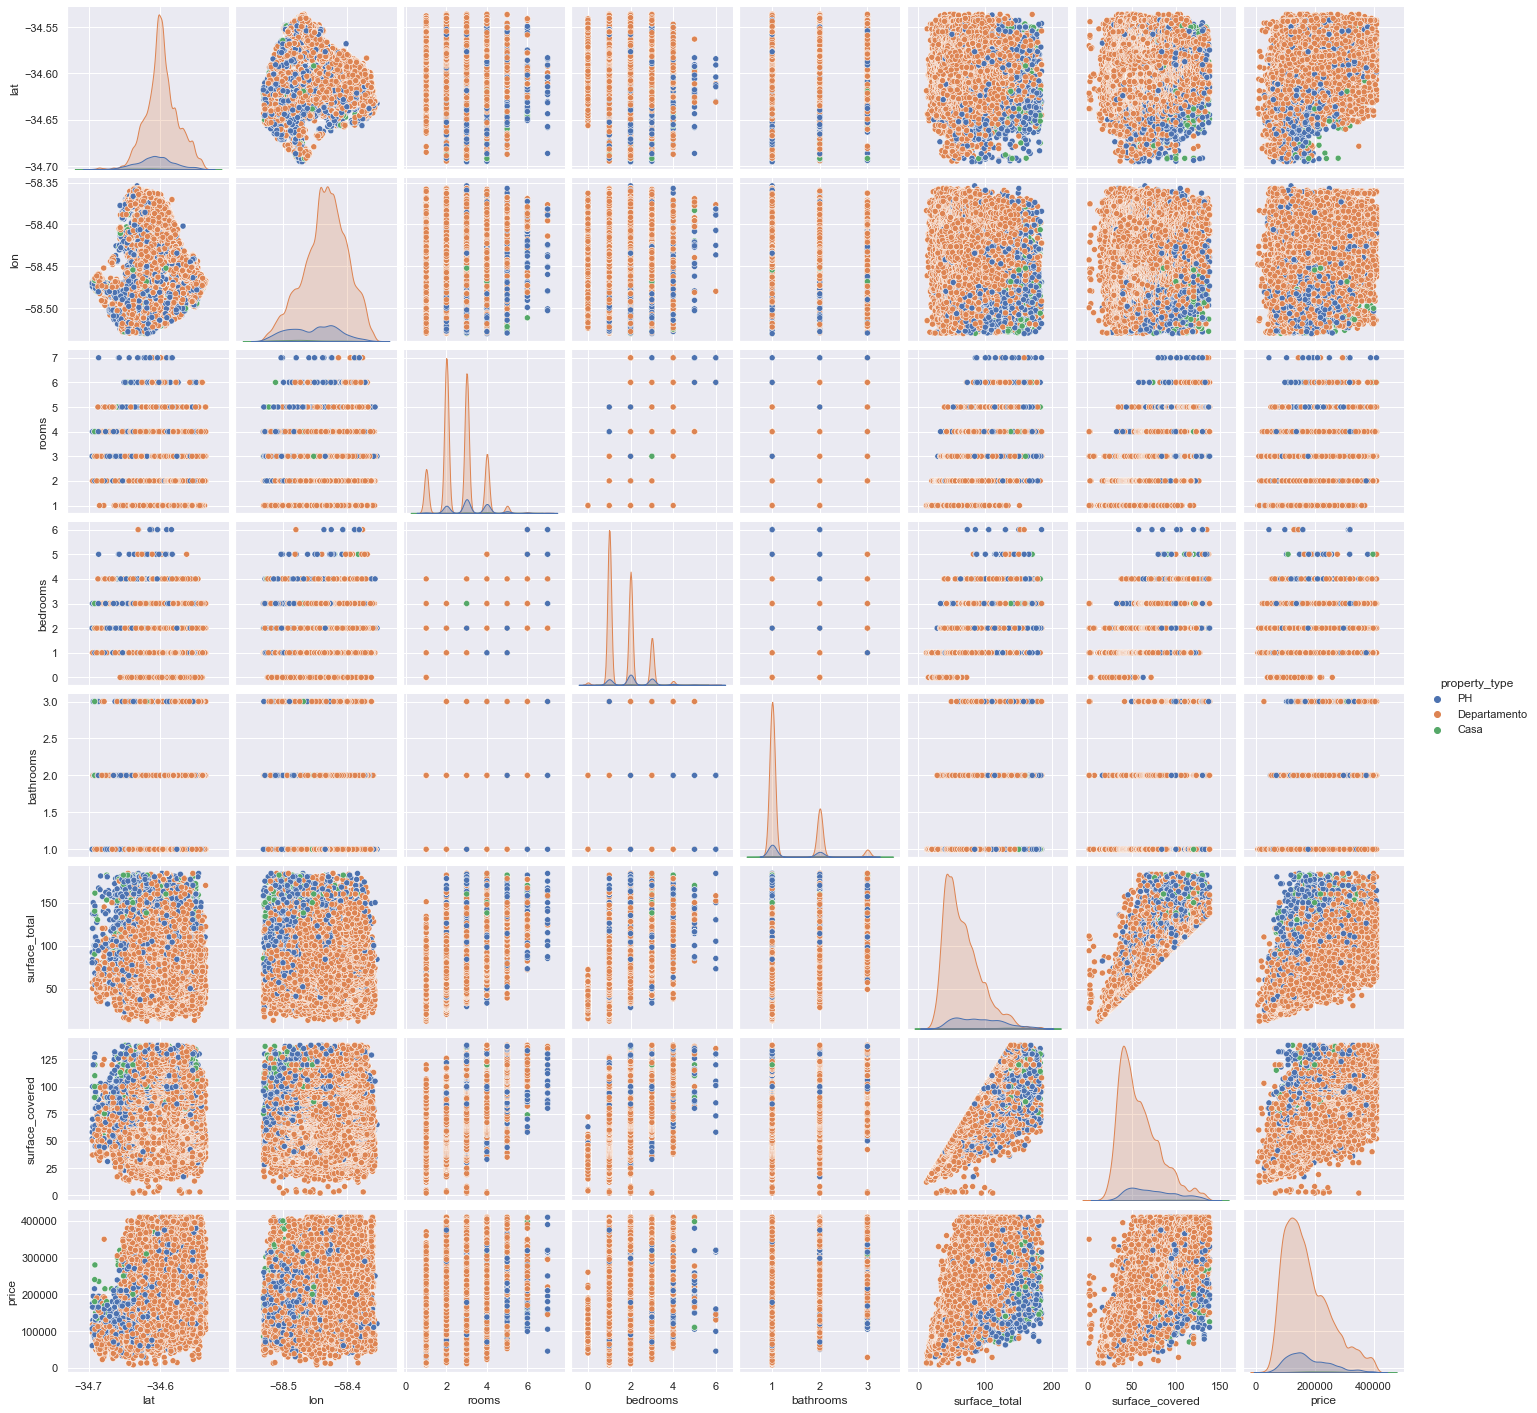

In [12]:
sns.pairplot(data, hue = 'property_type')

In [13]:
data.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                2941
lon                2941
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms           698
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

##### A simple vista, respecto a los valores faltantes en latitud y longitud, lo más razonable sería colocar en ellos un valor acorde al barrio en el cual esas viviendas se ubican.

In [14]:
data.bathrooms.isnull().groupby([data['property_type']]).sum().astype(int).reset_index(name='count')

property_type  count
0          Casa     12
1  Departamento    624
2            PH     62

Una opción podría ser reemplazar los valores nulos de los baños según el tipo de propiedad, en qué barrio se encuentre y su superficie cubierta. La idea generalmente en estos casos consiste en encontrar un criterio, lo suficientemente objetivo, como para no deformar la información que se pueda llegar a desprender posteriormente de nuestro dataset, y de esa manera no altere el poder predictivo de nuestro modelo.

In [15]:
data.bathrooms.isnull().groupby([data['price']]).sum().astype(int).reset_index(name='count')

price  count
0       7500.0      0
1      10800.0      0
2      12000.0      0
3      12500.0      0
4      13000.0      1
...        ...    ...
2852  408400.0      0
2853  408733.0      0
2854  409000.0      0
2855  410000.0      1
2856  410200.0      0

[2857 rows x 2 columns]

In [16]:
data['price-intervalos'] = pd.cut(data.price, bins  = 15)
vf_bathrooms_price = data.bathrooms.isnull().groupby([data['price-intervalos']]).sum().astype(int).reset_index(name='count')
vf_bathrooms_price

price-intervalos  count
0        (7097.3, 34346.667]      4
1     (34346.667, 61193.333]     12
2       (61193.333, 88040.0]    119
3      (88040.0, 114886.667]    106
4   (114886.667, 141733.333]    131
5     (141733.333, 168580.0]     85
6     (168580.0, 195426.667]     81
7   (195426.667, 222273.333]     38
8     (222273.333, 249120.0]     39
9     (249120.0, 275966.667]     44
10  (275966.667, 302813.333]     20
11    (302813.333, 329660.0]      6
12    (329660.0, 356506.667]      7
13  (356506.667, 383353.333]      3
14    (383353.333, 410200.0]      3

In [17]:
vf_bathrooms_price['freq'] = round(vf_bathrooms_price['count']/data.groupby([data['price-intervalos']]).count()['price'].values,5)*100
vf_bathrooms_price

price-intervalos  count   freq
0        (7097.3, 34346.667]      4  8.511
1     (34346.667, 61193.333]     12  1.437
2       (61193.333, 88040.0]    119  2.177
3      (88040.0, 114886.667]    106  1.114
4   (114886.667, 141733.333]    131  1.168
5     (141733.333, 168580.0]     85  0.886
6     (168580.0, 195426.667]     81  1.035
7   (195426.667, 222273.333]     38  0.690
8     (222273.333, 249120.0]     39  0.823
9     (249120.0, 275966.667]     44  1.147
10  (275966.667, 302813.333]     20  0.718
11    (302813.333, 329660.0]      6  0.425
12    (329660.0, 356506.667]      7  0.400
13  (356506.667, 383353.333]      3  0.280
14    (383353.333, 410200.0]      3  0.316

In [18]:
vf_bathrooms_price["bin_centres"] = vf_bathrooms_price['price-intervalos'].apply(lambda x: x.mid)
vf_bathrooms_price

price-intervalos  count   freq  bin_centres
0        (7097.3, 34346.667]      4  8.511   20721.9835
1     (34346.667, 61193.333]     12  1.437   47770.0000
2       (61193.333, 88040.0]    119  2.177   74616.6665
3      (88040.0, 114886.667]    106  1.114  101463.3335
4   (114886.667, 141733.333]    131  1.168  128310.0000
5     (141733.333, 168580.0]     85  0.886  155156.6665
6     (168580.0, 195426.667]     81  1.035  182003.3335
7   (195426.667, 222273.333]     38  0.690  208850.0000
8     (222273.333, 249120.0]     39  0.823  235696.6665
9     (249120.0, 275966.667]     44  1.147  262543.3335
10  (275966.667, 302813.333]     20  0.718  289390.0000
11    (302813.333, 329660.0]      6  0.425  316236.6665
12    (329660.0, 356506.667]      7  0.400  343083.3335
13  (356506.667, 383353.333]      3  0.280  369930.0000
14    (383353.333, 410200.0]      3  0.316  396776.6665

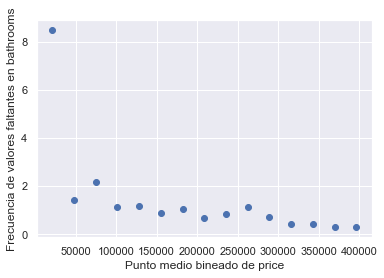

In [19]:
plt.scatter(vf_bathrooms_price['bin_centres'], vf_bathrooms_price['freq'])
plt.xlabel('Punto medio bineado de price')
plt.ylabel('Frecuencia de valores faltantes en bathrooms')
plt.show()

Como se puede observar, la presencia de valores faltantes en el atributo 'bathrooms' no parece guardar relación con el precio de la propiedad, más allá de el primer punto de la gráfica. Este punto, aunque represente a casi el 9% de la cantidad de instancias que caen en ese rango de precio, en valor absoluto de los datos falantes es tan solo 4.
Teniendo en cuenta que contamos con 698 valores faltantes, no sería una estrategia acorde imputar estableciendo relaciones con el precio.

In [20]:
data.bathrooms.isnull().groupby([data['surface_covered']]).sum().astype(int).reset_index(name='count')

surface_covered  count
0                2.0      0
1                3.0      0
2                4.0      0
3                5.0      0
4                7.0      0
..               ...    ...
128            134.0      0
129            135.0      0
130            136.0      0
131            137.0      0
132            138.0      0

[133 rows x 2 columns]

In [21]:
data['surface_covered-intervalos'] = pd.cut(data.surface_covered, bins  = 15)
vf_bathrooms_surface = data.bathrooms.isnull().groupby([data['surface_covered-intervalos']]).sum().astype(int).reset_index(name='count')
vf_bathrooms_surface

surface_covered-intervalos  count
0             (1.864, 11.067]      0
1            (11.067, 20.133]      4
2              (20.133, 29.2]     30
3              (29.2, 38.267]    131
4            (38.267, 47.333]    183
5              (47.333, 56.4]     86
6              (56.4, 65.467]     76
7            (65.467, 74.533]     59
8              (74.533, 83.6]     60
9              (83.6, 92.667]     22
10          (92.667, 101.733]     21
11           (101.733, 110.8]     11
12           (110.8, 119.867]      5
13         (119.867, 128.933]      7
14           (128.933, 138.0]      3

In [22]:
vf_bathrooms_surface['freq'] = round(vf_bathrooms_surface['count']/data.groupby([data['surface_covered-intervalos']]).count()['price'].values,5)*100
vf_bathrooms_surface

surface_covered-intervalos  count   freq
0             (1.864, 11.067]      0  0.000
1            (11.067, 20.133]      4  1.896
2              (20.133, 29.2]     30  1.522
3              (29.2, 38.267]    131  1.400
4            (38.267, 47.333]    183  1.411
5              (47.333, 56.4]     86  0.864
6              (56.4, 65.467]     76  0.883
7            (65.467, 74.533]     59  0.942
8              (74.533, 83.6]     60  1.081
9              (83.6, 92.667]     22  0.612
10          (92.667, 101.733]     21  0.641
11           (101.733, 110.8]     11  0.654
12           (110.8, 119.867]      5  0.489
13         (119.867, 128.933]      7  0.537
14           (128.933, 138.0]      3  0.397

In [23]:
vf_bathrooms_surface["bin_centres"] = vf_bathrooms_surface['surface_covered-intervalos'].apply(lambda x: x.mid)
vf_bathrooms_surface

surface_covered-intervalos  count   freq bin_centres
0             (1.864, 11.067]      0  0.000      6.4655
1            (11.067, 20.133]      4  1.896     15.6000
2              (20.133, 29.2]     30  1.522     24.6665
3              (29.2, 38.267]    131  1.400     33.7335
4            (38.267, 47.333]    183  1.411     42.8000
5              (47.333, 56.4]     86  0.864     51.8665
6              (56.4, 65.467]     76  0.883     60.9335
7            (65.467, 74.533]     59  0.942     70.0000
8              (74.533, 83.6]     60  1.081     79.0665
9              (83.6, 92.667]     22  0.612     88.1335
10          (92.667, 101.733]     21  0.641     97.2000
11           (101.733, 110.8]     11  0.654    106.2665
12           (110.8, 119.867]      5  0.489    115.3335
13         (119.867, 128.933]      7  0.537    124.4000
14           (128.933, 138.0]      3  0.397    133.4665

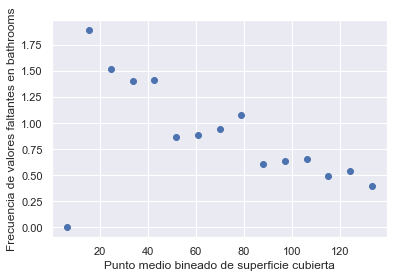

In [24]:
plt.scatter(vf_bathrooms_surface['bin_centres'], vf_bathrooms_surface['freq'])
plt.xlabel('Punto medio bineado de superficie cubierta')
plt.ylabel('Frecuencia de valores faltantes en bathrooms')
plt.show()

Si bien parecería que a mayor superficie cubierta, menos valores faltantes, debemos tener en cuenta que la escala del eje Y termina siendo muy chica, es decir que por más que a menor superficie se observan más valores faltantes, estos representan una cantidad muy pequeña del total de valores presentes para esos intervalos.

### <font color='green'>IMPUTAMOS VALORES FALTANTES </font>

Ya que no se observan relaciones muy claras y contundentes con los valores faltantes, se procede a imputar valores faltantes a través del método KNN Imputer, que aplica un modelo de Machine Learning para predecir ese valor que no se encuentra en el dataset.
Como indica la teoría, para proceder a imputar valores faltantes a través de este método, es necesario en una primera instancia escalar nuestros datos. Esto se debe a que el modelo de vecinos más cercanos trabaja con distancias para hacer sus predicciones.

In [25]:
data = data.drop(['start_date','end_date', 'created_on', 'l1', 'l2','currency',
                  'title', 'description', 'operation_type', 'price-intervalos', 'surface_covered-intervalos'], axis=1)

In [26]:
data.head(2)

lat        lon       l3  rooms  bedrooms  bathrooms  surface_total  \
1 -34.624056 -58.412110    Boedo    2.0       1.0        2.0           70.0   
2 -34.593569 -58.427474  Palermo    2.0       1.0        1.0           45.0   

   surface_covered     price property_type  
1             58.0  159000.0            PH  
2             45.0  125000.0            PH

In [27]:
data.reset_index(drop=True, inplace = True)

## <font color='red'> 3- Escalado </font>

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()

#Para estandarizar, debo quedarme solamente con las variables de entrada que contienen atributos cuantitativos
data_scaled =data[['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]

data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns = data_scaled.columns)

In [29]:
data_scaled.bathrooms.value_counts()

-0.575754    48056
 1.323124    15615
 3.222001     2175
Name: bathrooms, dtype: int64

In [30]:
print('Valores faltantes en bathrooms:', data_scaled.bathrooms.isna().sum())
print('Valores faltantes en latitud', data_scaled.lat.isna().sum())
print('Valores faltantes en longitud', data_scaled.lon.isna().sum())

Valores faltantes en bathrooms: 698
Valores faltantes en latitud 2941
Valores faltantes en longitud 2941


<AxesSubplot:xlabel='bathrooms', ylabel='count'>

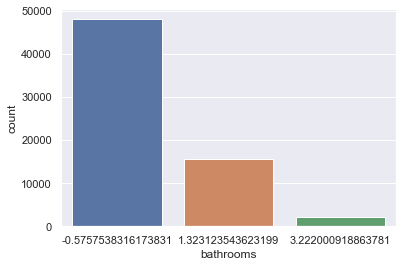

In [31]:
sns.countplot(data= data_scaled, x= 'bathrooms')

In [32]:
# volvemos a incoportar al dataset el atributo de salida 'y' 
data_scaled = data_scaled.join(data['price'])

In [33]:
data_scaled

lat       lon     rooms  bedrooms  bathrooms  surface_total  \
0     -1.087079  0.713163 -0.688736 -0.906767   1.323124       0.037229   
1      0.238242  0.271069 -0.688736 -0.906767  -0.575754      -0.801310   
2      0.771860  0.004034 -0.688736 -0.906767  -0.575754       0.540353   
3      0.229110 -0.125016 -0.688736 -0.906767  -0.575754      -0.432353   
4     -0.084283  0.110289 -0.688736 -0.906767  -0.575754       0.037229   
...         ...       ...       ...       ...        ...            ...   
66539  0.885161  0.039157 -0.688736 -0.906767  -0.575754       0.372645   
66540  0.754271  0.096313  0.354685  0.336073   1.323124       0.540353   
66541  0.766152 -0.167270  0.354685  0.336073   1.323124       0.640978   
66542  0.977092  0.071940  0.354685  0.336073  -0.575754       0.506811   
66543       NaN       NaN  2.441528  0.336073   1.323124       1.513059   

       surface_covered     price  
0            -0.111294  159000.0  
1            -0.646748  125000.0  
2            -0.440804  295000.0  
3            -0.193672  150000.0  
4             0.382970  159500.0  
...                ...       ...  
66539         0.794857  170000.0  
66540         0.836046  225000.0  
66541         0.877235  399000.0  
66542         0.959612  178000.0  
66543         1.412688  298000.0  

[66544 rows x 8 columns]

In [34]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

data_imputed = pd.DataFrame(imputer.fit_transform(data_scaled), columns = data_scaled.columns)

In [35]:
data_imputed.bathrooms.value_counts()

-0.575754    48505
 1.323124    15677
 3.222001     2181
 0.057205      105
 0.690164       66
 2.589042        7
 1.956083        3
Name: bathrooms, dtype: int64

In [36]:
data_imputed.head(2)

lat       lon     rooms  bedrooms  bathrooms  surface_total  \
0 -1.087079  0.713163 -0.688736 -0.906767   1.323124       0.037229   
1  0.238242  0.271069 -0.688736 -0.906767  -0.575754      -0.801310   

   surface_covered     price  
0        -0.111294  159000.0  
1        -0.646748  125000.0

In [37]:
data_imputed = data_imputed.join(data['l3'])

## <font color='red'> 4- Encoding </font>

Se realizará un encoding para la variable categórica del tipo de propiedad.

En el caso de la variable 'barrios' , para evitar un incremento dimensional tan grande (son 57 barrios), una opción sería utilizar LabelEncoder. Pero este feature se trabajará más detenidamente en el próximo punto para luego decidir qué estrategia es la más conveniente.

In [38]:
from sklearn.preprocessing import OneHotEncoder
data_encoded = data[['property_type']]
one = OneHotEncoder(handle_unknown = 'ignore')
data_encoded= pd.DataFrame(one.fit_transform(data_encoded).toarray())

## <font color='red'> 5- Generación de nuevas variables predictoras/reducción de dimensionalidad </font>

Aquí se agrupan los barrios en categorías.

In [39]:
data =data_imputed[['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered','price']]

#data = pd.DataFrame (scaler.inverse_transform(data), columns = data.columns)

In [40]:
data.head(2)

lat       lon       l3     rooms  bedrooms  bathrooms  surface_total  \
0 -1.087079  0.713163    Boedo -0.688736 -0.906767   1.323124       0.037229   
1  0.238242  0.271069  Palermo -0.688736 -0.906767  -0.575754      -0.801310   

   surface_covered     price  
0        -0.111294  159000.0  
1        -0.646748  125000.0

In [41]:
data = data.join(data_encoded)
data.head(2)

lat       lon       l3     rooms  bedrooms  bathrooms  surface_total  \
0 -1.087079  0.713163    Boedo -0.688736 -0.906767   1.323124       0.037229   
1  0.238242  0.271069  Palermo -0.688736 -0.906767  -0.575754      -0.801310   

   surface_covered     price    0    1    2  
0        -0.111294  159000.0  0.0  0.0  1.0  
1        -0.646748  125000.0  0.0  0.0  1.0

<AxesSubplot:xlabel='lon', ylabel='lat'>

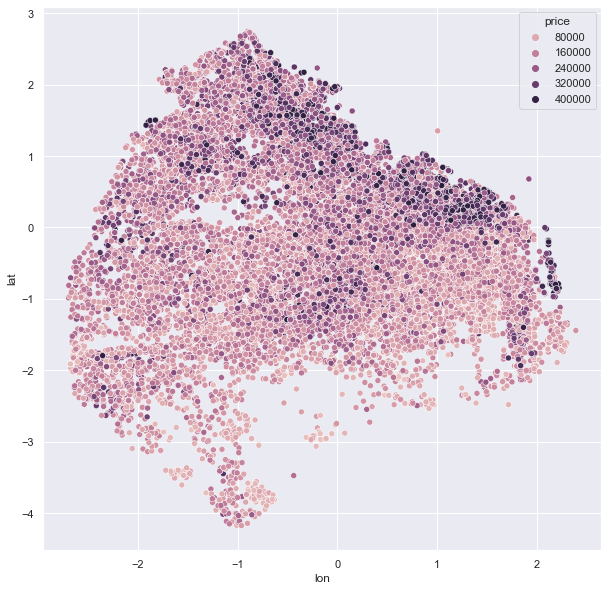

In [42]:
plt.figure(figsize = (10,10))
sns.scatterplot (data = data, x= 'lon', y= 'lat', hue = 'price')

En este paso, se tomó la decisión de crear una nueva categoría que agrupe los barrios según la zona a la que pertenezca. Para ello, se utiliza la clasificación oficial adopotaba por la Ciudad Autónoma de Buenos Aires en Comunas. Estas son 15 en total, y en caso de utilizar un OneHotEncoding la información quedaría bastante más comprensible que usando la columna 'l3' que consta de 57 valores.
Al buscar agrupar la categoría 'l3' según la zona, se considera que este es un criterio lo suficientemente objetivo para realizar tal división.

Vale acalarar que se encontraron algunas inconsistencias respecto a la demonimación de ciertos barrios adoptada en el dataset, ya que en realidad ellos no eran barrios propiamente dichos sino regiones dentro de alguno de los 48 barrios de la CABA.

In [43]:
data['comuna1'] = data['l3'].isin(['Retiro','Tribunales','Centro / Microcentro','Catalinas','San Nicolás','Puerto Madero',
                                  'Monserrat','San Telmo','Constitución'])
#data['comuna2'] = data['l3'].isin(['Recoleta','Barrio Norte'])
#data['comuna3'] = data['l3'].isin(['Balvanera','San Cristobal', 'Abasto', 'Congreso', 'Once'])
#data['comuna4'] = data['l3'].isin(['Boca', 'Barracas', 'Parque Patricios', 'Pompeya'])
#data['comuna5'] = data['l3'].isin(['Almagro','Boedo'])
#data['comuna6'] = data['l3'].isin(['Caballito', 'Parque Centenario'])
#data['comuna7'] = data['l3'].isin(['Flores', 'Parque Chacabuco'])
#data['comuna8'] = data['l3'].isin(['Villa Soldati', 'Villa Riachuelo', 'Villa Lugano'])
#data['comuna9'] = data['l3'].isin(['Liniers', 'Mataderos','Parque Avellaneda'])
#data['comuna10'] = data['l3'].isin(['Villa Real', 'Monte Castro', 'Versalles','Floresta', 'Velez Sarsfield','Villa Luro'])
#data['comuna11'] = data['l3'].isin(['Villa General Mitre', 'Villa Devoto','Villa del Parque', 'Villa Santa Rita'])
#data['comuna12'] = data['l3'].isin(['Coghlan', 'Saavedra', 'Villa Urquiza', 'Villa Pueyrredón'])
#data['comuna13'] = data['l3'].isin(['Nuñez', 'Belgrano', 'Colegiales'])
#data['comuna14'] = data['l3'].isin(['Palermo', 'Las Cañitas'])
#data['comuna15'] = data['l3'].isin(['Chacarita', 'Villa Crespo', 'Paternal', 'Villa Ortuzar', 'Agronomía', 'Parque Chas'])

<AxesSubplot:xlabel='lon', ylabel='lat'>

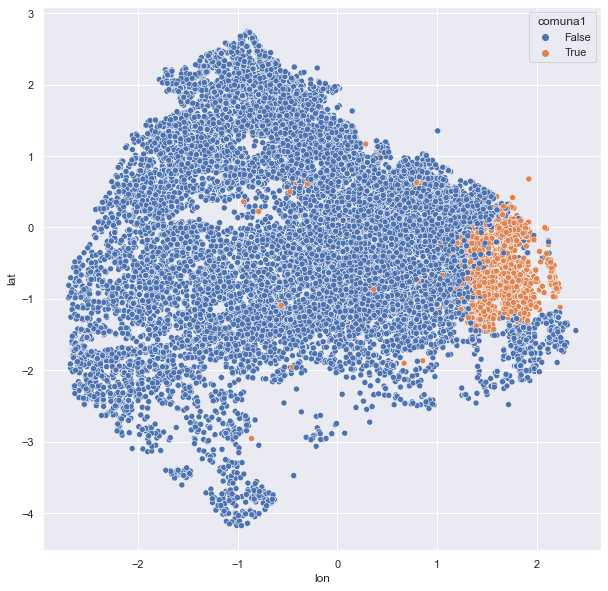

In [44]:
plt.figure(figsize = (10,10))

sns.scatterplot (data = data, x= 'lon', y= 'lat', hue = 'comuna1')

*Aquí se tomó como ejemplo a la hora de realizar el gráfico, a la comuna 1. Pero esta misma situación se replica para casi todas las comunas.*

In [45]:
data.drop(['comuna1'], inplace=True, axis= 1)

Dos hechos puntuales se destacan a la hora de realizar esta segmentación de los barrios en comunas:
+ Hay puntos que no se encuentran en la ubicación que deberían. Esto se debe a que, indudablemente, en el dataset hay propiedades que están mal cargadas respecto al barrio al que pertenecen
+ Al suceder esto y correr el modelo de ML, la introducción de esta variable como predictora solo generaría más confusión al algoritmo a la hora de ajustar sus parámetros, ya que algunas ubicaciones no están bien computadas y se le hará más dificil encontrar patrones en los datos a raíz del barrio o comuna
+ La creación de 15 nuevas columnas al DataFrame genera un costo computacional considerable al momento de ejecutar el modelo de vecinos más cercanos

Ante esta situación, y haciendo énfasis en el primer ítem señalado supra, se decide crear una nueva segmentación en zonas pero ya no teniendo en cuenta la columna de barrios cargada en el dataset sino a partir de las coordenadas de la propiedad.
Este nuevo criterio, eliminaría el error contenido en el dataset respecto a los barrios mal cargados.

In [46]:
# Este bloque de código se encuentra comentado ya que, luego de analizar todas las posibilidades (se verá más abajo),
#se toma la decisión de que no es una estrategia acorde al objetivo que estamos buscando


data['noreste'] = (data.lon >= 0.5) & (data.lat >= 0)
#data['este'] = (data.lon >= 0.5) & (data.lat < 0) & (data.lat >= -1)
#data['sureste'] = (data.lon >= 0.5) & (data.lat < -1)
#data['norte'] = (data.lon > -1) & (data.lon < 0.5) & (data.lat > 0)
#data['centro'] = (data.lon > -1) & (data.lon < 0.5) & (data.lat >= -1) & (data.lat <= 0)
#data['sur'] = (data.lon > -1) & (data.lon < 0.5) & (data.lat < -1)
#data['noroeste'] = (data.lon <= -1) & (data.lat > 0)
#data['oeste'] = (data.lon <= -1) & (data.lat >= -1) & (data.lat <= 0)
#data['sur'] = (data.lon <= -1) & (data.lat < -1)

<AxesSubplot:xlabel='lon', ylabel='lat'>

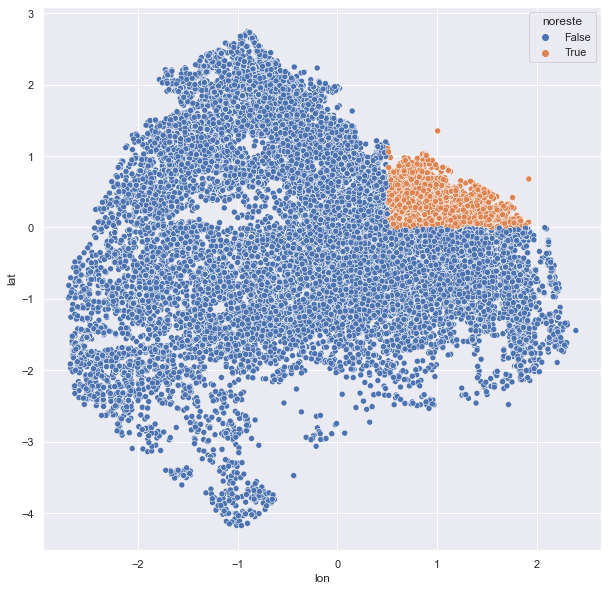

In [47]:
plt.figure(figsize = (10,10))

sns.scatterplot (data = data, x= 'lon', y= 'lat', hue = 'noreste')

In [48]:
data.drop(['noreste'], inplace=True, axis= 1)

## Aquí, se vuelven a entrenar los dos modelos implementado en el proyecto 1. Pero, ahora, con nuestro dataset transformado

In [49]:
from sklearn.model_selection import train_test_split

X = data.drop(['price', 'l3'], axis= 1)

y = data.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

tree_regressor = DecisionTreeRegressor(max_depth=8)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [51]:
y_train_pred = tree_regressor.predict (X_train)
y_test_pred = tree_regressor.predict (X_test)

In [52]:
print('La precisión del modelo de árbol de decisión en set de train es:', tree_regressor.score (X_train,y_train))
print('La precisión del modelo de árbol de decisión en set de test es:', tree_regressor.score (X_test,y_test))

La precisión del modelo de árbol de decisión en set de train es: 0.7833938368647744
La precisión del modelo de árbol de decisión en set de test es: 0.7659733807486626


In [53]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')

La raíz del error cuadrático medio en Train es: 36251.85886830459
La raíz del error cuadrático medio en Test es: 37548.632572187526


C:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'valor predicho(US$)')

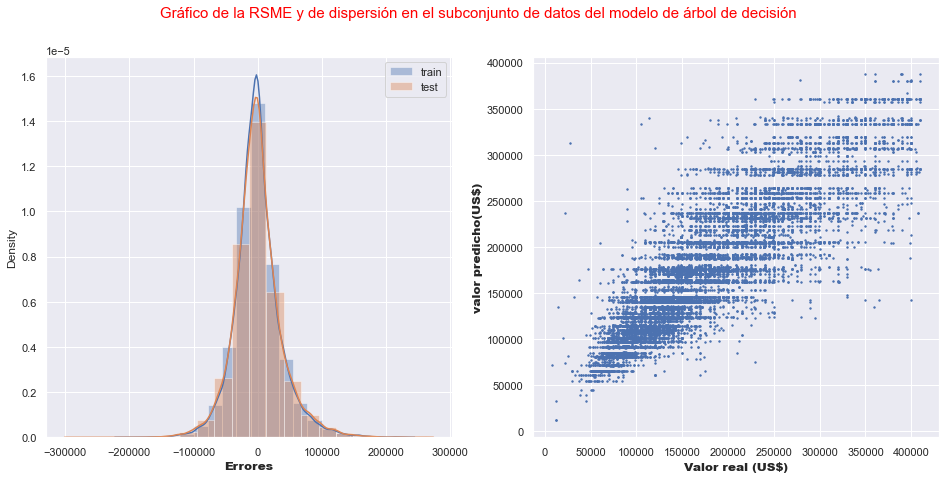

In [54]:
plt.figure(figsize = (16,7))
plt.suptitle('Gráfico de la RSME y de dispersión en el subconjunto de datos del modelo de árbol de decisión', fontsize= 15, color='red')

plt.subplot (1,2,1)

sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('Errores', fontweight = "black", fontsize = 12)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test,y_test_pred, s =2)
plt.xlabel('Valor real (US$)', fontweight = "black", fontsize = 12)
plt.ylabel('valor predicho(US$)', fontweight = "black", fontsize = 12)

In [55]:
y_train_pred_2 = knn_regressor.predict (X_train)
y_test_pred_2 = knn_regressor.predict (X_test)

In [56]:
print('La precisión del modelo de vecinos más cercanos es:', knn_regressor.score (X_train,y_train))
print('La precisión del modelo de vecinos más cercanos en set de test es:', knn_regressor.score (X_test,y_test))

La precisión del modelo de vecinos más cercanos es: 0.9055929986067018
La precisión del modelo de vecinos más cercanos en set de test es: 0.8530620184899664


In [57]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')

La raíz del error cuadrático medio en Train es: 23932.99100531812
La raíz del error cuadrático medio en Test es: 29752.84714625413


C:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Valor predicho (US$)')

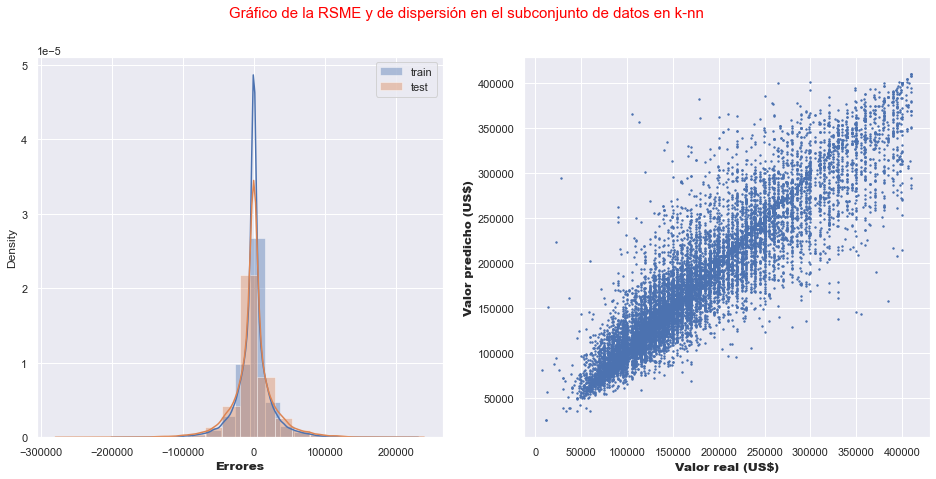

In [58]:
plt.figure(figsize = (16,7))
plt.suptitle('Gráfico de la RSME y de dispersión en el subconjunto de datos en k-nn ', fontsize= 15, color='red')

plt.subplot (1,2,1)

sns.distplot(y_train - y_train_pred_2, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_2, bins = 20, label = 'test')
plt.xlabel('Errores',fontweight = "black", fontsize = 12)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test,y_test_pred_2, s =2)
plt.xlabel('Valor real (US$)', fontweight = "black", fontsize = 12)
plt.ylabel('Valor predicho (US$)', fontweight = "black", fontsize = 12)

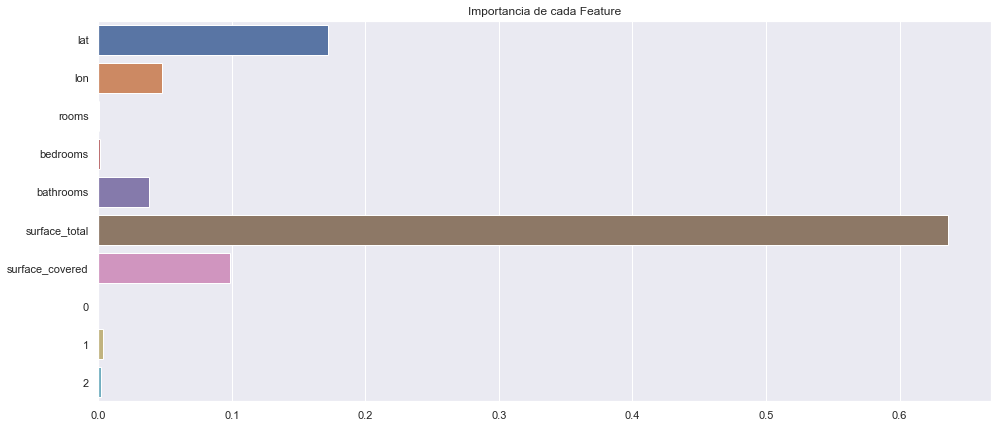

In [59]:
plt.figure(figsize = (16,7))

importances = tree_regressor.feature_importances_
columns = X.columns
sns.barplot(y = columns, x= importances)
plt.title('Importancia de cada Feature')
plt.show()

Luego de realizar todas las iteraciones posibles con los atributos nuevos generados (Comunas/Zonas) se desprende que:
    
+ La utilización del nuevo feature 'Comunas' obtiene un rendimiento prácticamente idéntico a cuando se usa el feature 'Zonas'.
La diferencia radica en el tiempo de ejecución del modelo K-NN. Con el feature Comunas, el entrenamiento del modelo conlleva un costo computacional mayor. Esto era esperable ya que, en el primer caso, el dataframe debe incorporar 15 nuevas columnas, mientras que aplicando la divisón de los barrios por zonas se crean 9 columnas.
+ Se observa que, si para la ubicación solo seguimos empleando las características de longitud y latitud, la performance de los modelos de árbol de regresión y vecinos más cercanos es también muy buena (de hecho, es mejor que si en los casos anteriores nos desprendiéramos de ellas y solo utilizáramos alguno de los dos nuevos atributos creados). Y, no menos importante, el costo computacional es ostensiblemente más bajo.

Es decir, las variables de longitud y latitud son mejores predictoras que los barrios y todos los features que podamos crear con ellos (Comunas/Zonas).
Esto es esperable si tenemos en cuenta que la forma más precisa y exacta de localizar una ubicación es justamente con los atributos de longitud y latitud. Y posiblemente el modelo a medida que se va entrenando logrará identificar que hay ciertos puntos que contienen viviendas con precios en promedio más altos que otros puntos más alejados. 
Ya con solo ver los gráficos se percibe que todas las coordenadas ubicadas en la región noreste contienen la mayor cantidad de propiedades con precios más altos.


## COMPARACIÓN RESPECTO A LOS MODELOS DEL PROYECTO 1

En este punto, las diferencias que se encuentran son *sustanciales*.

Para el modelo de árbol de regresión, habíamos obtenido los siguientes resultados:

    + Score en train: 0.69
    + Score en test: 0.64
    
    + RMSE en train: ~165.000
    + RMSE en test: ~175.000
    
Para el modelo de vecinos más cercanos, habíamos obtenido los siguientes resultados:
    
    + Score en train: 0.76
    + Score en test: 0.68
    
    + RMSE en train: ~144.000
    + RMSE en test: ~165.000
  
Estos resultados dejan en evidencia la trascendencia que tiene la transformación de los datos a la hora de entregarle al modelo nuestras viarables para que pueda entrenar y realizar sus predicciones.
En este proyecto, a diferencia del anterior, hemos aplicado las técnicas de preprocesamiento de imputación de valores faltantes, eliminación de outliers, escalado y encoding que le han dado a nuestro dataset una mayor coherencia y claridad. Esto permite que el modelo se entrene con datos donde es más fácil identificar patrones y establecer relaciones.

## PARTE B - Modelos Avanzados

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

randomf = RandomForestRegressor()
randomf_scores = cross_val_score(randomf, X, y, cv=5)
randomf.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
print(randomf_scores)
print("Precisión para Random Forest: %0.2f (+/- %0.2f)" % (randomf_scores.mean(), randomf_scores.std() * 2))

[0.9066359  0.91094869 0.89317046 0.89796788 0.91179912]
Precisión para Random Forest: 0.90 (+/- 0.01)


Text(0, 0.5, 'Valor predicho (US$)')

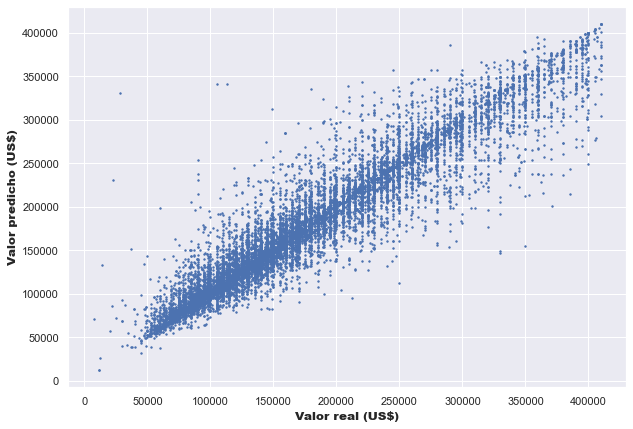

In [63]:
y_train_pred3 = randomf.predict(X_train)
y_test_pred3 = randomf.predict(X_test)

plt.figure(figsize = (10,7))

plt.scatter(y_test,y_test_pred3, s =2)
plt.xlabel('Valor real (US$)', fontweight = "black", fontsize = 12)
plt.ylabel('Valor predicho (US$)', fontweight = "black", fontsize = 12)

In [64]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred3))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred3))
print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')
print('La precisión del modelo de Random Forest en train es:', randomf.score (X_train,y_train))
print('La precisión del modelo de Random Forest en test es:', randomf.score (X_test,y_test))

La raíz del error cuadrático medio en Train es: 9905.117233896226
La raíz del error cuadrático medio en Test es: 23314.95597173093
La precisión del modelo de Random Forest en train es: 0.9838292751123178
La precisión del modelo de Random Forest en test es: 0.909770986989623


#### Aquí, antes de observar cómo se comporta el modelo avazado con atributos polinómicos y aplicando una regulación Lasso, primero observaremos cómo se desempeña un modelo sencillo como el de regresión lineal y luego le aplicaremos las técnicas comentadas anteriormente

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

# PARA LA REGULARIZACIÓN UTILIZAREMOS LA TÉCNICA L1 O LASSO, YA QUE ESTA VA ELIMINANDO AQUELLOS ATRIBUTOS QUE TIENEN UNA MENOR
# IMPORTANCIA A LA HORA DE PREDECIR LA VARIABLE DE SALIDA 'y'

In [66]:
reg_lineal = LinearRegression()
reg_lineal_scores = cross_val_score(reg_lineal, X, y, cv=5)
reg_lineal.fit(X_train, y_train)

LinearRegression()

In [67]:
print(reg_lineal_scores)
print("Precisión para el modelo de Regresión Lineal: %0.2f (+/- %0.2f)" % (reg_lineal_scores.mean(), reg_lineal_scores.std() * 2))

[0.69064676 0.69005219 0.68726356 0.67656966 0.67370297]
Precisión para el modelo de Regresión Lineal: 0.68 (+/- 0.01)


In [68]:
#Ahora evaluamnos en el conjunto de hold-hout
y_train_pred4 = reg_lineal.predict(X_train)
y_test_pred4 = reg_lineal.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred4))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred4))
print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')
print('La precisión del modelo de Regresión Lineal en train es:', reg_lineal.score (X_train,y_train))
print('La precisión del modelo de Regresión Lineal en test es:', reg_lineal.score (X_test,y_test))

La raíz del error cuadrático medio en Train es: 43602.5875461822
La raíz del error cuadrático medio en Test es: 43977.291824652064
La precisión del modelo de Regresión Lineal en train es: 0.686646338411854
La precisión del modelo de Regresión Lineal en test es: 0.6789786103756219


*Ahora aplicaremos la técnica de atributos polinómicos y volveremos a entrenar un modelo de regresión lineal*

In [69]:
poly = PolynomialFeatures(4, include_bias=False)

X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(49908, 1000) (16636, 1000)


In [70]:
reg_polynomial = LinearRegression()
reg_polynomial.fit(X_train_new, y_train)

y_train_pred_5 = reg_polynomial.predict(X_train_new)
y_test_pred_5 = reg_polynomial.predict(X_test_new)

In [71]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_5))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_5))
print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')
print('La precisión del modelo de en train es:', reg_polynomial.score (X_train_new,y_train))
print('La precisión del modelo de en test es:', reg_polynomial.score (X_test_new,y_test))

La raíz del error cuadrático medio en Train es: 36851.045179820714
La raíz del error cuadrático medio en Test es: 41758.9276062213
La precisión del modelo de en train es: 0.7761743428360769
La precisión del modelo de en test es: 0.7105485817608421


### Como puede verse, hay una diferencia más marcada que en los otros modelos respecto al rendimiento en train y en test, esto se debea un efecto provocado por la introducción de nuevos atributos a partir de Polynomial Features.
### Es por ello que se acude a la regularización, como veremos a continuación

In [72]:
reg_lasso = Lasso()
reg_lasso.fit(X_train_new,y_train)

C:\Users\leand\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33748259694478.89, tolerance: 30280282182.2099
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [73]:
y_train_pred_6 = reg_lasso.predict(X_train_new)
y_test_pred_6= reg_lasso.predict(X_test_new)

In [74]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_6))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_6))

print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')
print('La precisión del modelo de en train es:', reg_lasso.score (X_train_new,y_train))
print('La precisión del modelo de en test es:', reg_lasso.score (X_test_new,y_test))

La raíz del error cuadrático medio en Train es: 37024.12961105645
La raíz del error cuadrático medio en Test es: 38150.09933862504
La precisión del modelo de en train es: 0.7740668467579503
La precisión del modelo de en test es: 0.7584158965548702


*Ahora sí, tenemos un modelo que generaliza mejor para datos que no ha visto, aunque su performance sigue distando bastante de ser óptima.*

### <font color='red'> Optimización de hiperparámetros <font>

Para Random Forest aplicaremos la ténica de Grid Search, mientras que en el modelo de regresión lineal usaremos Random Search.
Primero se hizo una búsqueda manual en aquellos hiperparámetros más importantes para definir en qué rangos de cada uno de ellos podría encontrarse el mejor rendimiento, así no quedaba una grilla tan amplia que conlleve un costo computacional muy elevado.

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp

In [76]:
param_grid = {'n_estimators': [107, 127, 147, 167, 187],
              'max_features': [5, 6],
              'random_state': [42],
              'n_jobs' : [-1]}

In [77]:
model = GridSearchCV(randomf, param_grid, cv=5)

model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [5, 6],
                         'n_estimators': [107, 127, 147, 167, 187],
                         'n_jobs': [-1], 'random_state': [42]})

In [78]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores hiperparámetros: {'max_features': 6, 'n_estimators': 187, 'n_jobs': -1, 'random_state': 42}
Mejor Score: 0.9011353645013562



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.469816      0.546218         0.083397        0.013308   
1       1.503823      0.025669         0.097049        0.020839   
2       1.673489      0.067192         0.115150        0.036730   
3       1.869130      0.084488         0.163481        0.035084   
4       2.390597      0.188797         0.117819        0.009018   
5       1.586406      0.042279         0.098114        0.025243   
6       1.854499      0.028811         0.125213        0.046004   
7       2.063950      0.034071         0.105777        0.008623   
8       2.330260      0.033017         0.111152        0.011583   
9       2.625561      0.065839         0.130776        0.022887   

  param_max_features param_n_estimators param_n_jobs param_random_state  \
0                  5                107           -1                 42   
1                  5                127           -1                 42   
2                  5                147           -1                 42   
3                  5                167           -1                 42   
4                  5                187           -1                 42   
5                  6                107           -1                 42   
6                  6                127           -1                 42   
7                  6                147           -1                 42   
8                  6                167           -1                 42   
9                  6                187           -1                 42   

                                              params  split0_test_score  \
0  {'max_features': 5, 'n_estimators': 107, 'n_jo...           0.900260   
1  {'max_features': 5, 'n_estimators': 127, 'n_jo...           0.900529   
2  {'max_features': 5, 'n_estimators': 147, 'n_jo...           0.900773   
3  {'max_features': 5, 'n_estimators': 167, 'n_jo...           0.900951   
4  {'max_features': 5, 'n_estimators': 187, 'n_jo...           0.901031   
5  {'max_features': 6, 'n_estimators': 107, 'n_jo...           0.900665   
6  {'max_features': 6, 'n_estimators': 127, 'n_jo...           0.900926   
7  {'max_features': 6, 'n_estimators': 147, 'n_jo...           0.900998   
8  {'max_features': 6, 'n_estimators': 167, 'n_jo...           0.901087   
9  {'max_features': 6, 'n_estimators': 187, 'n_jo...           0.901159   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.902028           0.899134           0.905427           0.895614   
1           0.902121           0.899237           0.905573           0.895861   
2           0.902341           0.899367           0.905729           0.896146   
3           0.902356           0.899457           0.905793           0.896297   
4           0.902469           0.899484           0.905931           0.896205   
5           0.901560           0.898731           0.905448           0.896355   
6           0.901608           0.899085           0.905740           0.896418   
7           0.901895           0.899046           0.905716           0.896848   
8           0.901934           0.899239           0.905778           0.896982   
9           0.902141           0.899367           0.905851           0.897158   

   mean_test_score  std_test_score  rank_test_score  
0         0.900493        0.003237               10  
1         0.900664        0.003205                8  
2         0.900871        0.003174                6  
3         0.900971        0.003141                4  
4         0.901024        0.003218                2  
5         0.900552        0.003031                9  
6         0.900755        0.003073                7  
7         0.900900        0.002968                5  
8         0.901004        0.002931                3  
9         0.901135        0.002905                1

In [79]:
y_train_pred_7 = model.predict(X_train)
y_test_pred_7= model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_7))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_7))

print('La precisión del modelo de Random Forest con optimización de hiperparámetros es:', model.score (X_test,y_test))

print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')

La precisión del modelo de Random Forest con optimización de hiperparámetros es: 0.9118406994061142
La raíz del error cuadrático medio en Train es: 9682.91518130485
La raíz del error cuadrático medio en Test es: 23046.000359120164


In [80]:
param_dist ={'alpha': np.random.random(6)}

model_2 = RandomizedSearchCV(reg_lasso, param_dist, cv=5, n_jobs=-1, n_iter= 6, random_state=42)
lasso_best = model_2.fit(X_train_new, y_train)

C:\Users\leand\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33795904380929.94, tolerance: 30280282182.2099
  model = cd_fast.enet_coordinate_descent(


In [81]:
print("Mejores hiperparámetros: "+str(lasso_best.best_params_))
print("Mejor Score: "+str(lasso_best.best_score_)+'\n')

scores = pd.DataFrame(lasso_best.cv_results_)
scores

Mejores hiperparámetros: {'alpha': 0.8777886564829569}
Mejor Score: 0.7623964937860788



mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0      70.607269      2.900479         0.034032        0.006859     0.01576   
1      67.713341      3.363558         0.035608        0.006593    0.877789   
2      66.905178      4.895585         0.037011        0.006068    0.009897   
3      62.494210      2.842647         0.032005        0.005404    0.616583   
4      68.097614      4.915256         0.030656        0.001375    0.254763   
5      52.028746      1.461618         0.021874        0.007661    0.677587   

                            params  split0_test_score  split1_test_score  \
0   {'alpha': 0.01576019434614806}           0.760701           0.764936   
1    {'alpha': 0.8777886564829569}           0.760438           0.765863   
2  {'alpha': 0.009897434707426433}           0.760702           0.764933   
3    {'alpha': 0.6165828705690328}           0.760577           0.765570   
4    {'alpha': 0.2547631193328348}           0.760658           0.765166   
5    {'alpha': 0.6775871741435607}           0.760530           0.765633   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.767722           0.759508           0.758261         0.762226   
1           0.767350           0.759891           0.758440         0.762396   
2           0.767724           0.759500           0.758253         0.762222   
3           0.767460           0.759846           0.758468         0.762384   
4           0.767652           0.759811           0.758441         0.762346   
5           0.767429           0.759876           0.758468         0.762387   

   std_test_score  rank_test_score  
0        0.003549                5  
1        0.003530                1  
2        0.003552                6  
3        0.003491                3  
4        0.003482                4  
5        0.003495                2

En cuanto a la elección de un modelo, se optaría por un Random Forest 187 árboles ya que este obtiene un desempeño significativamente alto. En contraposición, el modelo de regresión lineal, adaptado con atributos polinómicos y regularizado con la técnica Lasso, tiene una gran desventaja en este punto del performance. Pero, además, su tiempo de entrenamiento y costo computacional es mucho mayor.

Ahora bien, adentrándonos en el modelo de Random Forest, pudimos observar cómo la optimización de hiperparámetros no nos reportó un modelo con un mayor desempeño. 
Al haberlo ejecutado con sus argumentos por default, el rendimiento fue similar. Además, en aquella ocasión el número de árboles que se utilizaron fue 100, lo que se traduce en un modelo de menor complejidad y tiempo de entrenamiento.
Por ende, esta sería la mejor opción al momento de optar por uno u otro modelo.

## PARTE C - Interpretación de modelos

In [82]:
randomf_best = RandomForestRegressor(max_features= 6, n_estimators= 187, n_jobs= -1, random_state= 42)
randomf_best.fit(X_train, y_train)

RandomForestRegressor(max_features=6, n_estimators=187, n_jobs=-1,
                      random_state=42)

In [83]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': randomf_best.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
5    surface_total     0.349513
6  surface_covered     0.262602
0              lat     0.187759
1              lon     0.101145
4        bathrooms     0.059045
2            rooms     0.017936
3         bedrooms     0.008480
8                1     0.007266
9                2     0.005668
7                0     0.000585

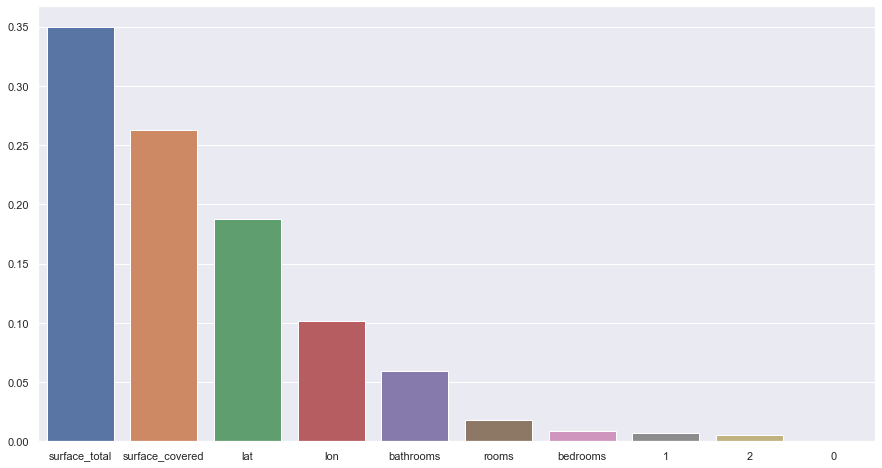

In [84]:
importances = randomf_best.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(x= columns[indices], y= importances[indices])
plt.show()

Del gráfico y la tabla realizada anteriormente, se desprende que los atributos predictores de mayor fuerza para nuestro modelo de Randon Forest son la superficie total y cubierta, así como la latitud  y longitud.
Por el contrario, se observa que features como el tipo de propiedad o canditad de habitaciones, ambientes y baños, poco tienen para aportar a nuestra predicción.

La raíz del error cuadrático medio en Train es: 9682.91518130485
La raíz del error cuadrático medio en Test es: 23046.000359120164
La precisión del modelo de en train es: 0.9845466548878571
La precisión del modelo de en test es: 0.9118406994061142


C:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\leand\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Valor predicho (US$)')

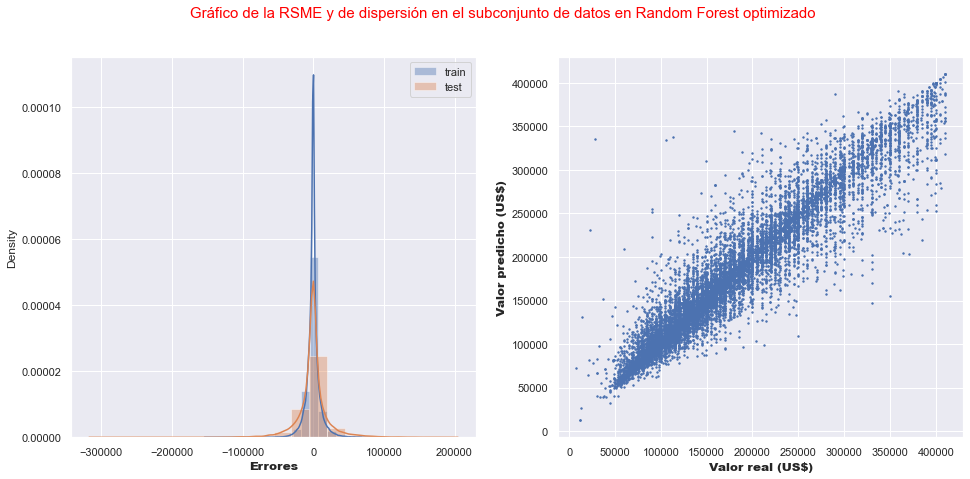

In [85]:
y_train_pred_8 = randomf_best.predict(X_train)
y_test_pred_8 = randomf_best.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_8))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_8))
print(f'La raíz del error cuadrático medio en Train es: {rmse_train}')
print(f'La raíz del error cuadrático medio en Test es: {rmse_test}')
print('La precisión del modelo de en train es:', randomf_best.score (X_train,y_train))
print('La precisión del modelo de en test es:', randomf_best.score (X_test,y_test))

plt.figure(figsize = (16,7))
plt.suptitle('Gráfico de la RSME y de dispersión en el subconjunto de datos en Random Forest optimizado', fontsize= 15, color='red')

plt.subplot (1,2,1)

sns.distplot(y_train - y_train_pred_8, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_8, bins = 20, label = 'test')
plt.xlabel('Errores',fontweight = "black", fontsize = 12)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test,y_test_pred_8, s =2)
plt.xlabel('Valor real (US$)', fontweight = "black", fontsize = 12)
plt.ylabel('Valor predicho (US$)', fontweight = "black", fontsize = 12)

In [86]:
lasso_best = model_2.best_estimator_

In [87]:
#Para el caso del modelo de regresión lineal con atributos polinómicos y regularizado con la técnica Lasso, se obtuvieron los
#siguientes parámetros: (pendientes y ordenada al origen)
#Primero entrenamos un modelo con el mejor parámetro de alpha obtenido:

lasso_best.fit(X_train_new,y_train)

C:\Users\leand\miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33795904380929.94, tolerance: 30280282182.2099
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.8777886564829569)

In [88]:
print(lasso_best.coef_, lasso_best.intercept_)

[ 2.20888975e+04  5.13563991e+03  3.74103648e+04  2.32070774e+03
  1.91653738e+04  2.71312641e+04 -7.53390280e+03  0.00000000e+00
  1.53290441e+04 -6.42435294e+03 -3.51394275e+02  4.63143918e+03
  5.24821830e+03 -1.37775551e+03 -1.79689693e+02  5.64500232e+03
  7.39776233e+02 -2.13456326e+03  5.71909954e+03 -0.00000000e+00
 -1.64100664e+03 -6.56552301e+01  1.36217087e+03  1.76649996e+03
  4.27066741e+03 -4.33183859e+03 -7.66344959e+02  1.37233621e+03
 -0.00000000e+00 -1.89610731e+03 -2.70903693e+03 -1.98398806e+03
  2.10264104e+03  1.87932882e+03 -0.00000000e+00 -1.97202123e+04
 -2.05453375e+04 -1.13112542e-01 -1.23675279e+02 -1.02041636e+03
  2.69075799e+03 -1.31142975e+01 -6.23317976e+02  7.21337209e+02
 -6.69265751e+02 -1.18609090e+03  2.12860627e+03  0.00000000e+00
  3.93053706e+02 -1.19466866e+03 -1.21733105e+04  2.48030588e+04
 -4.91453791e+03  2.38059589e+04  4.21290899e+03 -1.48760522e+04
 -3.89479523e+02 -1.43502588e+03  1.47949579e+04  0.00000000e+00
  0.00000000e+00  0.00000

### <font color='GREEN'> CUESTIONES A MEJORAR: </font>

- En todos los modelos de Random Forest implementados, se observa que se alcanza un techo de rendimiento (para el conjunto de test) en torno al 91%. Con esos mismos hiperparámetros, en general el subconjunto de train ronda el 98% de R cuadrado. Esta situación no se supo si era un clásico escenario de overfitting o no. Es por ello que se avanzó en probrar con todos los criterios que se han encontrado como para evitar el sobreajuste, como los de poda, control de tamaño y parada temprana.
En esa línea, se manejaron variados valores de la más amplia amplitud para los siguientes hiperparámetros, sin obtener un resultado satisfactorio que equilibraba los rendimientos en los conjuntos de train y test:

     *min_samples_split*
     
     *min_samples_leaf*
 
     *max_leaf_nodes*
 
     *max_depth*

- Otro aspecto a tener en cuenta consiste en la introducción de nuevas variables predictoras, en el apartado destinado a generación de nuevos features a partir de nuestro dataset.
En ese sentido, se buscó crear una nueva columna con la información respectiva del precio del metro cuadrado. Ello se hizo con el siguiente bloque de código:

            data['price_m2']= data.price / data.surface_total
            
            
Allí se presentaron dos interrogantes. Primero, si este atributo debía crearse antes de hacer el escalado de datos (ya que en todos los manuales y también en los ejercicios del proyecto, el escalado de datos figura como una etapa previa a  la generación de nuevos atributos). El problema estaría en que, para este caso, el precio es nuestra variable de salida o a predecir, y por tanto no forma parte del escalado. Por el contrario, superficie total sí es una variable que se escala, entonces si generamos un nuevo atributo con el precio del metro cuadrado, estaríamos realizando una operación matemática con dos variables que se encuentran en diferentes escalas.
Por este motivo, se optaron diversas formas para tratar de adaptar y generar esta nueva columna.

Una de ellas fue crear el atributo "price_m2" antes de realizar el escalado.
Ahora bien, lo interesante aquí es que a la hora de correr nuestros modelos de ML, se observa una performance casi perfecta, en torno al 99%. De hecho, se puede evidenciar que el modelo termina utilizando solamente dos columnas para predecir la variable 'y'. Ellas son, 'surface_total' y 'price_m2'. 
Sin conocer a fondo el motivo, parecería quedar implícito que a la hora de generar nuevos atributos, estos deberían hacerse a partir de cualquiera de nuestras variables de nuestro dataset, a excepción de aquella que queremos predecir. Por ejemplo, en este caso para el modelo calcular el precio terminaría siendo una cuestión casi obvia, ya que lo único que debería hacer es multiplicar la superficie de esa instancia por el precio del metro cuadrado. De ahí la precisión a la hora de predecir y la intrascendencia que terminan cobrando todos los otros features.

El otro camino transcurrido fue el de crear este nuevo atributo posterior al escalado de datos. En esa ocasión, el rendimiento para el modelo de árboles de regresión también fue muy alto, pero la diferencia en k-NN estuvo bastante marcada. Esto no sorprende, porque ya se indicó que en esta clase de modelos se trabaja con distancias, y de allí la importancia de que todas las columnas estén en la misma escala.